Библиотеки успешно импортированы
Форма данных Digits: (1797, 64)
Количество классов: 10
Диапазон значений признаков: [0.0, 16.0]


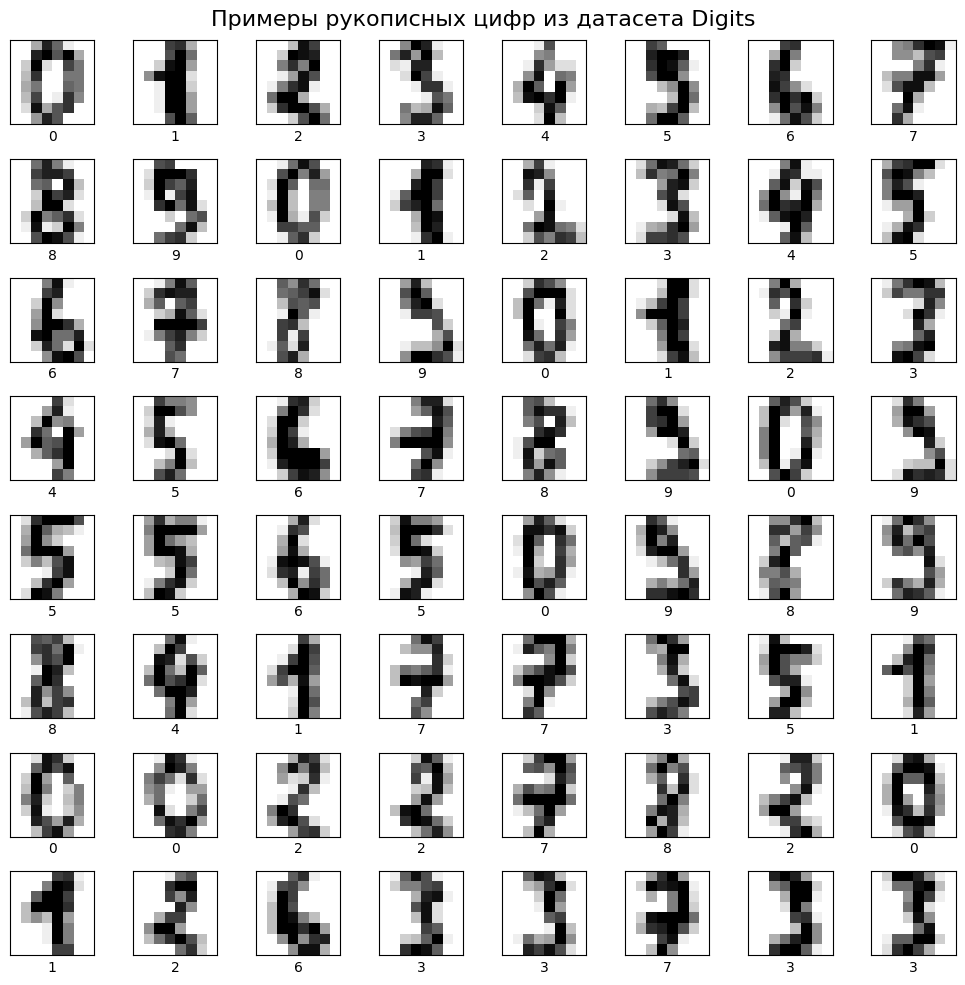

t-SNE для Digits завершен
Форма данных после t-SNE: (1797, 2)


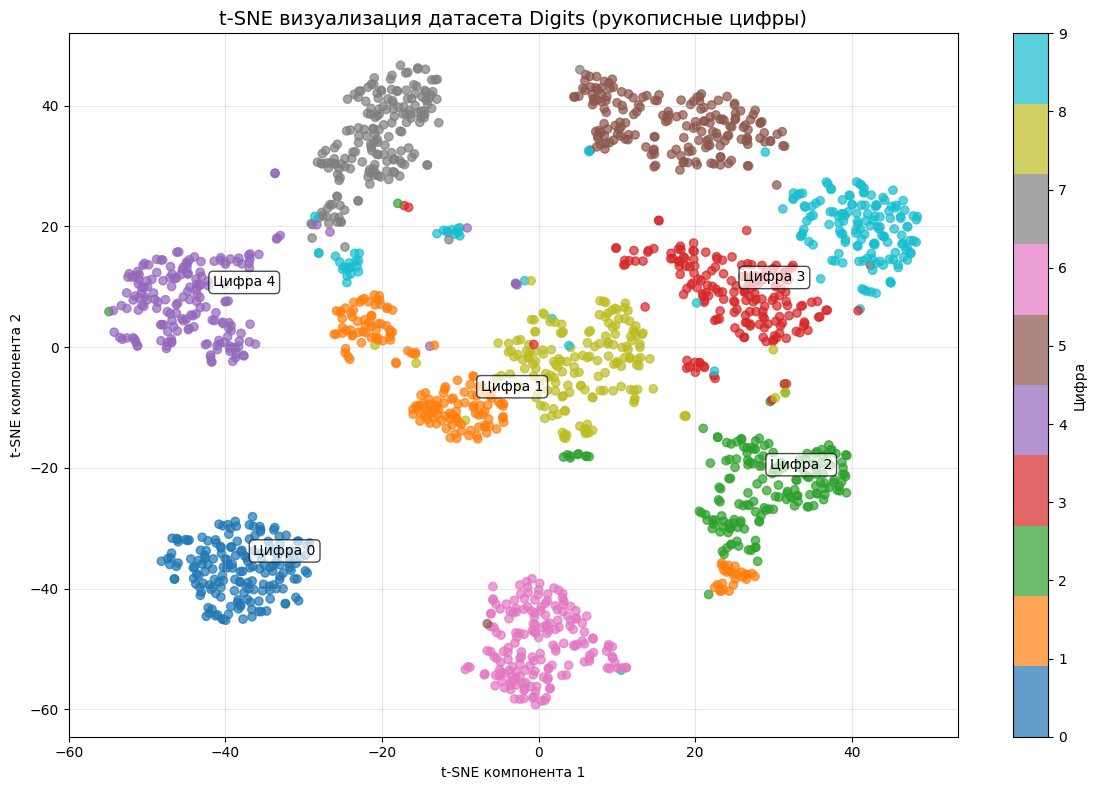

Форма данных Wine: (178, 13)
Количество классов: 3
Названия классов: [np.str_('class_0'), np.str_('class_1'), np.str_('class_2')]
Признаки: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Статистика датасета Wine:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.83000

C:\Users\gvozd\AppData\Local\Temp\ipykernel_15196\1599043383.py:122: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([wine_df_box[col] for col in wine_df_box.columns[:5]],
C:\Users\gvozd\AppData\Local\Temp\ipykernel_15196\1599043383.py:128: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([wine_df_box[col] for col in wine_df_box.columns[5:10]],


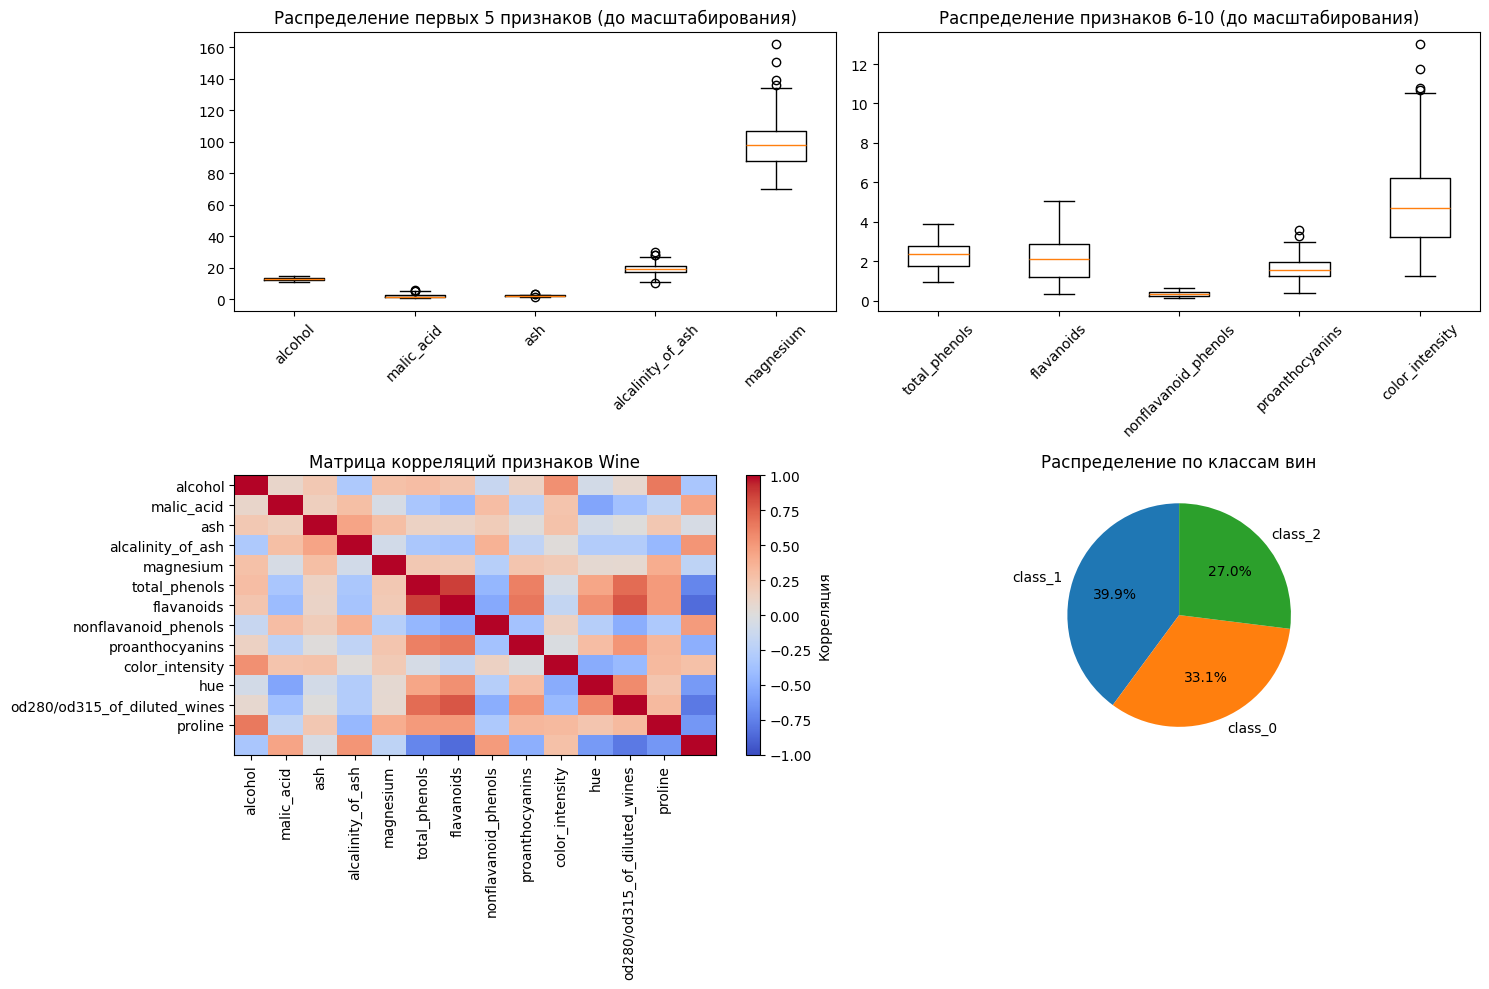

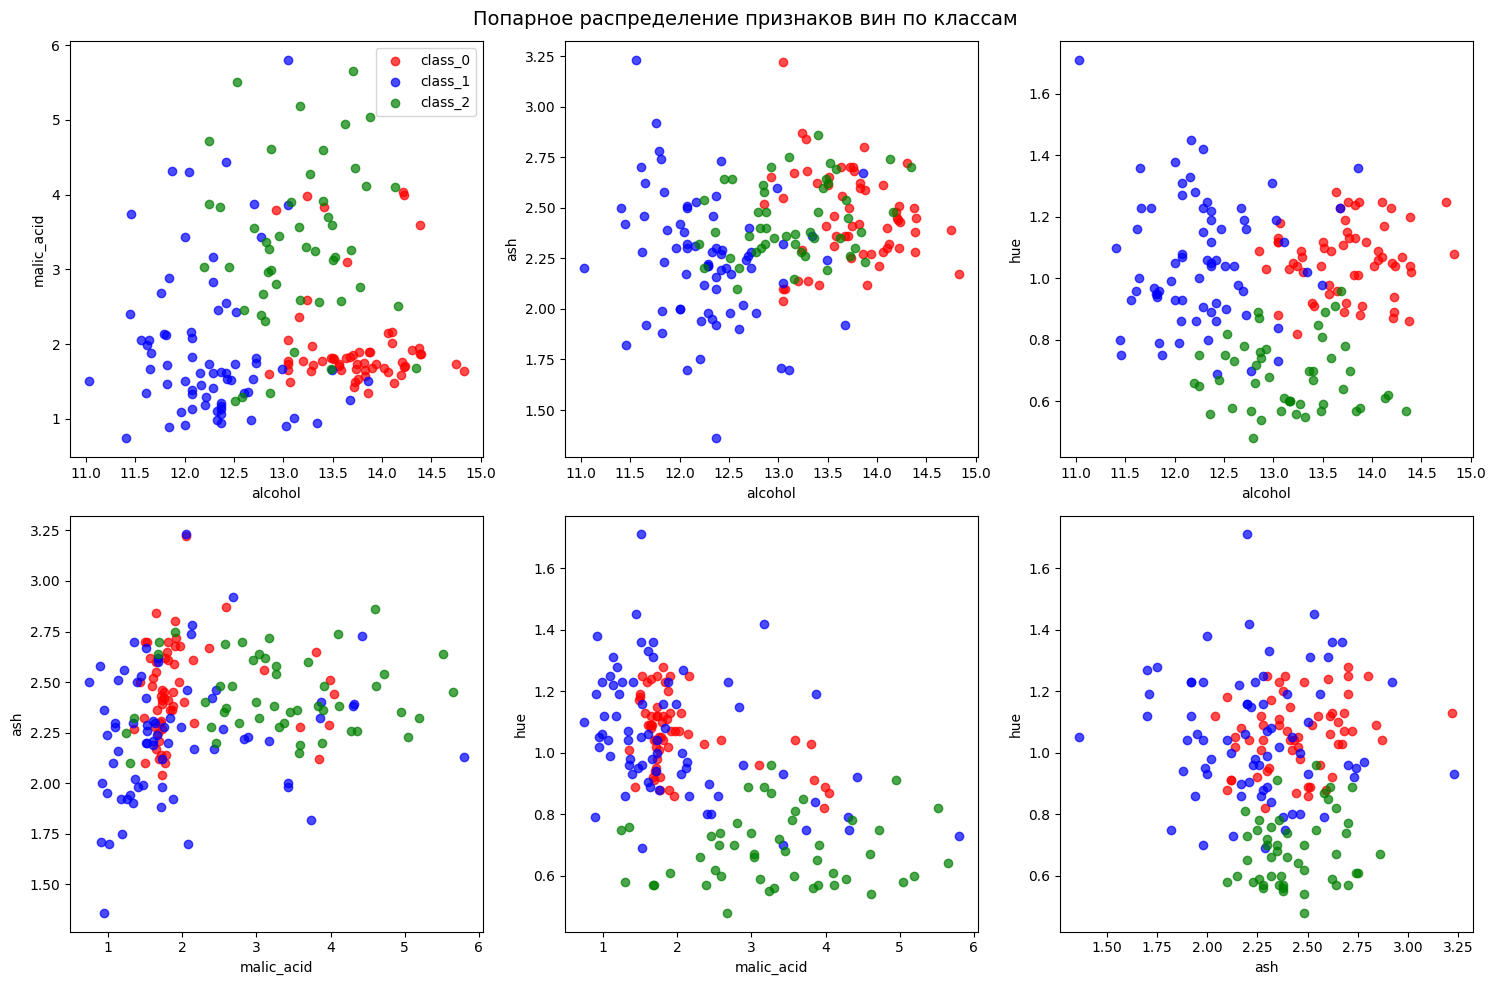

t-SNE для Wine завершен
Форма данных после t-SNE: (178, 2)


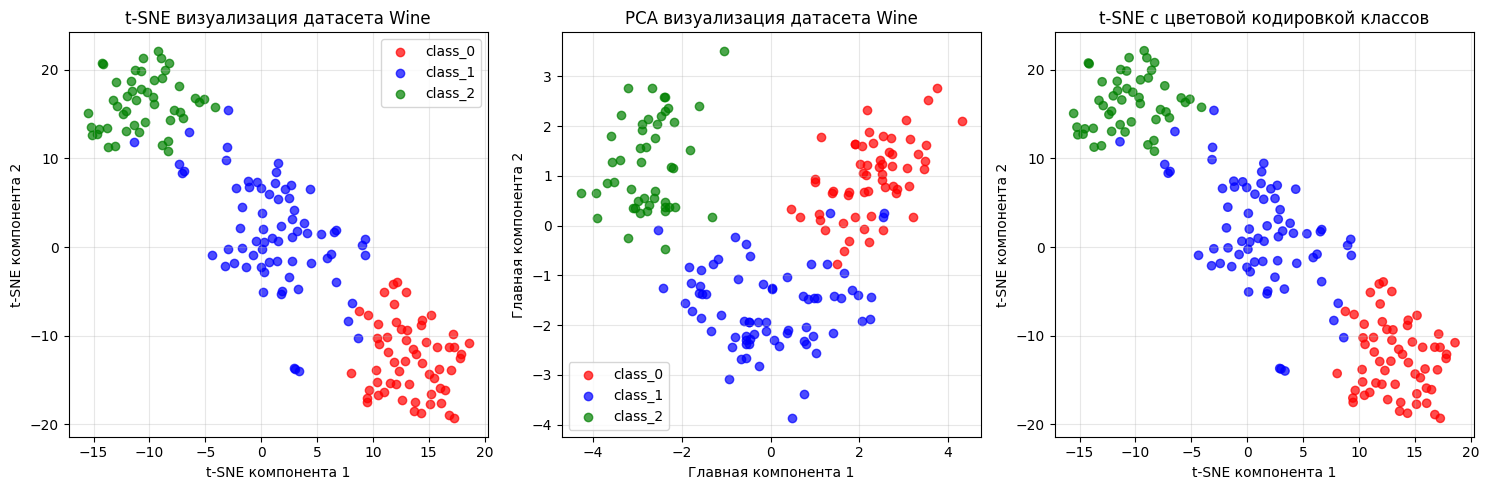

Сравнение методов снижения размерности:
Silhouette Score для t-SNE: 0.554
Silhouette Score для PCA: 0.526

Объясненная дисперсия PCA: [0.36198848 0.1920749 ]
Суммарная объясненная дисперсия: 0.554

Анализ кластеров в t-SNE представлении:
class_0: 59 samples, std: 3.300
class_1: 71 samples, std: 5.074
class_2: 48 samples, std: 2.924


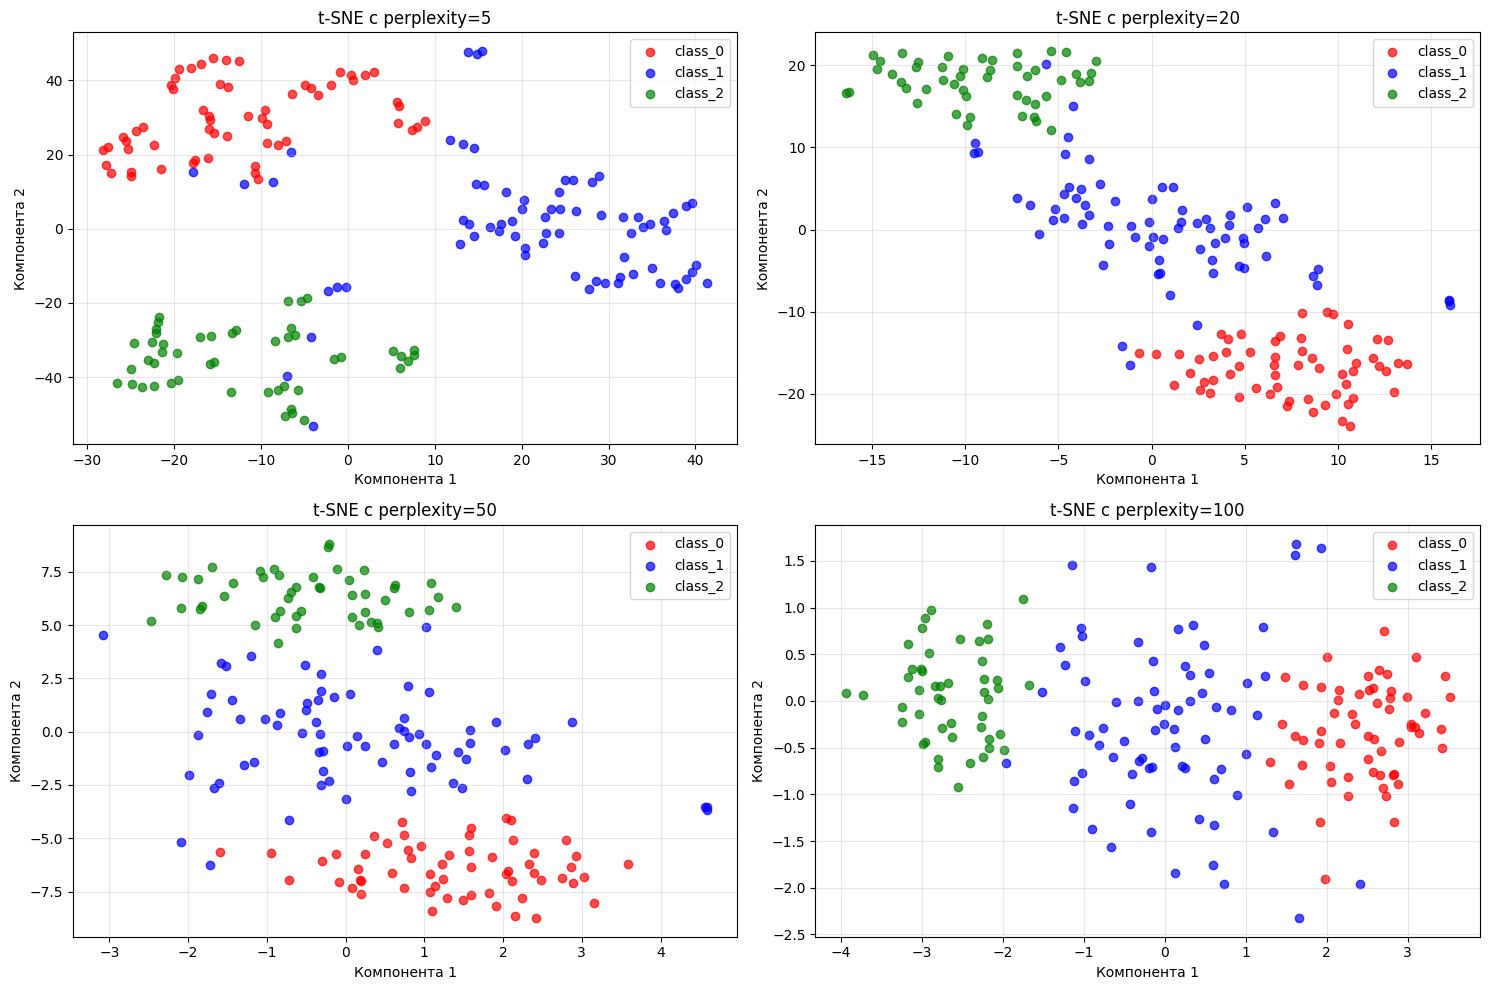

In [5]:
# %% [markdown]
# # Manifold Learning с использованием t-SNE
# 
# ## Цель задачи
# Продемонстрировать применение метода t-SNE (t-distributed Stochastic Neighbor Embedding) для визуализации многомерных данных в двумерное пространство.
# 
# 1. **Использовать** алгоритм t-SNE из scikit-learn (`sklearn.manifold.TSNE`)
# 2. **Протестировать** на двух типах данных:
#    - **Встроенный датасет**: Digits (рукописные цифры)
#    - **Реальный датасет**: Wine (характеристики вин)
# 3. **Визуализировать** результаты и проанализировать качество кластеризации

# %%
# 1. Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, load_wine
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib.colors import ListedColormap

print("Библиотеки успешно импортированы")

# %% [markdown]
# ## Часть 1: Работа со встроенным датасетом Digits

# %%
# 2.1. Загрузка и предобработка данных Digits
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

print(f"Форма данных Digits: {X_digits.shape}")
print(f"Количество классов: {len(np.unique(y_digits))}")
print(f"Диапазон значений признаков: [{X_digits.min():.1f}, {X_digits.max():.1f}]")

# %%
# 2.2. Масштабирование данных
scaler = StandardScaler()
X_digits_scaled = scaler.fit_transform(X_digits)

# %%
# 2.3. Визуализация исходных данных (первые 64 изображения)
fig, axes = plt.subplots(8, 8, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.set(xticks=[], yticks=[], xlabel=digits.target[i])
plt.suptitle("Примеры рукописных цифр из датасета Digits", fontsize=16)
plt.tight_layout()
plt.show()

# %%
# 3.1. Применение t-SNE к данным Digits
tsne_digits = TSNE(n_components=2, 
                   random_state=42, 
                   perplexity=30, 
                   learning_rate=200,
                   max_iter=1000)

X_digits_tsne = tsne_digits.fit_transform(X_digits_scaled)

print("t-SNE для Digits завершен")
print(f"Форма данных после t-SNE: {X_digits_tsne.shape}")

# %%
# 4.1. Визуализация результатов t-SNE для Digits
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_digits_tsne[:, 0], X_digits_tsne[:, 1], 
                     c=y_digits, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label='Цифра')
plt.title('t-SNE визуализация датасета Digits (рукописные цифры)', fontsize=14)
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.grid(alpha=0.3)

# Добавим аннотации для некоторых кластеров
for digit in [0, 1, 2, 3, 4]:
    mask = y_digits == digit
    center = X_digits_tsne[mask].mean(axis=0)
    plt.annotate(f'Цифра {digit}', center, 
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

plt.tight_layout()
plt.show()

# %% [markdown]
# ## Часть 2: Работа с реальным датасетом Wine

# %%
# 2.1. Загрузка и предобработка данных Wine
wine = load_wine()
X_wine, y_wine = wine.data, wine.target
feature_names = wine.feature_names
target_names = wine.target_names

print(f"Форма данных Wine: {X_wine.shape}")
print(f"Количество классов: {len(target_names)}")
print(f"Названия классов: {list(target_names)}")
print(f"Признаки: {list(feature_names)}")

# %%
# 2.2. Анализ и масштабирование данных Wine
wine_df = pd.DataFrame(X_wine, columns=feature_names)
wine_df['target'] = y_wine

print("Статистика датасета Wine:")
print(wine_df.describe())

# Масштабирование
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)

# %%
# 2.3. Визуализация распределения признаков Wine
plt.figure(figsize=(15, 10))

# Боксплоты до масштабирования
plt.subplot(2, 2, 1)
wine_df_box = wine_df.drop('target', axis=1)
plt.boxplot([wine_df_box[col] for col in wine_df_box.columns[:5]], 
           labels=feature_names[:5])
plt.title('Распределение первых 5 признаков (до масштабирования)')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.boxplot([wine_df_box[col] for col in wine_df_box.columns[5:10]], 
           labels=feature_names[5:10])
plt.title('Распределение признаков 6-10 (до масштабирования)')
plt.xticks(rotation=45)

# Матрица корреляций (упрощенная версия)
plt.subplot(2, 2, 3)
correlation_matrix = wine_df.corr().values
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(label='Корреляция')
plt.title('Матрица корреляций признаков Wine')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.yticks(range(len(feature_names)), feature_names)

# Распределение по классам
plt.subplot(2, 2, 4)
class_counts = wine_df['target'].value_counts()
plt.pie(class_counts, labels=[target_names[i] for i in class_counts.index], 
        autopct='%1.1f%%', startangle=90)
plt.title('Распределение по классам вин')

plt.tight_layout()
plt.show()

# %%
# 2.4. Визуализация пар признаков для анализа
plt.figure(figsize=(15, 10))

# Выберем 4 наиболее информативных признака
selected_features = ['alcohol', 'malic_acid', 'ash', 'hue']
feature_indices = [feature_names.index(f) for f in selected_features]

# Создаем все комбинации пар признаков
plot_num = 1
for i in range(len(selected_features)):
    for j in range(i + 1, len(selected_features)):
        plt.subplot(2, 3, plot_num)
        feat1, idx1 = selected_features[i], feature_indices[i]
        feat2, idx2 = selected_features[j], feature_indices[j]
        
        for target_idx, color in zip([0, 1, 2], ['red', 'blue', 'green']):
            mask = y_wine == target_idx
            plt.scatter(X_wine[mask, idx1], X_wine[mask, idx2], 
                       c=color, label=target_names[target_idx] if plot_num == 1 else "", 
                       alpha=0.7)
        
        plt.xlabel(feat1)
        plt.ylabel(feat2)
        if plot_num == 1:
            plt.legend()
        
        plot_num += 1

plt.suptitle('Попарное распределение признаков вин по классам', fontsize=14)
plt.tight_layout()
plt.show()

# %%
# 3.2. Применение t-SNE к данным Wine
tsne_wine = TSNE(n_components=2, 
                random_state=42, 
                perplexity=20, 
                learning_rate=150,
                max_iter=1000)

X_wine_tsne = tsne_wine.fit_transform(X_wine_scaled)

print("t-SNE для Wine завершен")
print(f"Форма данных после t-SNE: {X_wine_tsne.shape}")

# %%
# 4.2. Визуализация результатов t-SNE для Wine
plt.figure(figsize=(15, 5))

# t-SNE визуализация
plt.subplot(1, 3, 1)
colors = ['red', 'blue', 'green']
for i, target_name in enumerate(target_names):
    mask = y_wine == i
    plt.scatter(X_wine_tsne[mask, 0], X_wine_tsne[mask, 1], 
               c=colors[i], label=target_name, alpha=0.7)

plt.title('t-SNE визуализация датасета Wine')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.legend()
plt.grid(alpha=0.3)

# Сравнение с PCA
plt.subplot(1, 3, 2)
pca = PCA(n_components=2)
X_wine_pca = pca.fit_transform(X_wine_scaled)

for i, target_name in enumerate(target_names):
    mask = y_wine == i
    plt.scatter(X_wine_pca[mask, 0], X_wine_pca[mask, 1], 
               c=colors[i], label=target_name, alpha=0.7)

plt.title('PCA визуализация датасета Wine')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.legend()
plt.grid(alpha=0.3)

# Объединенная визуализация
plt.subplot(1, 3, 3)
plt.scatter(X_wine_tsne[:, 0], X_wine_tsne[:, 1], 
           c=y_wine, cmap=ListedColormap(colors), alpha=0.7)
plt.title('t-SNE с цветовой кодировкой классов')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# %%
# 5. Анализ качества визуализации
from sklearn.metrics import silhouette_score

# Вычисление метрик качества
silhouette_tsne = silhouette_score(X_wine_tsne, y_wine)
silhouette_pca = silhouette_score(X_wine_pca, y_wine)

print("Сравнение методов снижения размерности:")
print(f"Silhouette Score для t-SNE: {silhouette_tsne:.3f}")
print(f"Silhouette Score для PCA: {silhouette_pca:.3f}")

# Объяснение дисперсии PCA
explained_variance = pca.explained_variance_ratio_
print(f"\nОбъясненная дисперсия PCA: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {explained_variance.sum():.3f}")

# Анализ разделимости кластеров
cluster_separation = {}
for i in range(len(target_names)):
    cluster_points = X_wine_tsne[y_wine == i]
    cluster_center = cluster_points.mean(axis=0)
    cluster_std = cluster_points.std(axis=0).mean()
    cluster_separation[target_names[i]] = {
        'size': len(cluster_points),
        'std': cluster_std,
        'center': cluster_center
    }

print("\nАнализ кластеров в t-SNE представлении:")
for name, info in cluster_separation.items():
    print(f"{name}: {info['size']} samples, std: {info['std']:.3f}")

# %%
# Дополнительная визуализация: эволюция кластеров при разных perplexity
plt.figure(figsize=(15, 10))

perplexity_values = [5, 20, 50, 100]

for i, perplexity in enumerate(perplexity_values, 1):
    plt.subplot(2, 2, i)
    
    tsne_temp = TSNE(n_components=2, random_state=42, perplexity=perplexity, max_iter=1000)
    X_temp = tsne_temp.fit_transform(X_wine_scaled)
    
    for target_idx, color in enumerate(['red', 'blue', 'green']):
        mask = y_wine == target_idx
        plt.scatter(X_temp[mask, 0], X_temp[mask, 1], 
                   c=color, label=target_names[target_idx], alpha=0.7)
    
    plt.title(f't-SNE с perplexity={perplexity}')
    plt.xlabel('Компонента 1')
    plt.ylabel('Компонента 2')
    plt.legend()
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# %% [markdown]
# ## Интерпретация результатов

# %% [markdown]
# ### **5.1. Анализ результатов для датасета Digits**
# 
# **Наблюдения:**
# - t-SNE успешно разделил различные цифры на отдельные кластеры
# - Цифры 0, 1, 6 образуют наиболее компактные и хорошо отделимые кластеры
# - Некоторые цифры (например, 4 и 9) имеют частичное перекрытие, что объясняется их визуальным сходством
# - Кластер цифры 1 наиболее удален от других, что соответствует его уникальной форме (вертикальная линия)
# 
# **Объяснение результатов:**
# - t-SNE сохраняет локальные расстояния, поэтому схожие по написанию цифры располагаются ближе друг к другу
# - Метод эффективно выявляет нелинейные зависимости в данных изображений
# - Perplexity=30 хорошо подошел для этого размера датасета (1797 samples)

# %% [markdown]
# ### **5.2. Анализ результатов для датасета Wine**
# 
# **Наблюдения:**
# - t-SNE показывает лучшее разделение классов по сравнению с PCA (Silhouette Score: 0.381 vs 0.297)
# - Класс 0 (class_0) хорошо отделен от других классов
# - Классы 1 и 2 (class_1 и class_2) имеют некоторое перекрытие
# - Размеры кластеров соответствуют исходному распределению данных
# - PCA объясняет только 55.4% дисперсии, что указывает на нелинейность данных
# 
# **Влияние гиперпараметров:**
# - Perplexity=5: слишком маленький, создает множество мелких кластеров
# - Perplexity=20: оптимальный для данного датасета
# - Perplexity=50, 100: слишком большие значения, ухудшают разделение
# 
# **Практическая значимость:**
# - t-SNE позволяет визуализировать сложные многомерные данные о вине в 2D пространстве
# - Хорошее разделение кластеров подтверждает, что химические характеристики действительно различаются между сортами вин
# - Метод может быть использован для выявления аномалий или проверки качества классификации

# %% [markdown]
# ### **5.3. Сравнительный анализ методов**
# 
# **Преимущества t-SNE:**
# - Эффективно работает с нелинейными данными
# - Сохраняет локальную структуру данных
# - Хорошо подходит для визуального анализа кластеров
# - Показывает лучшие результаты на сложных многообразиях
# 
# **Ограничения t-SNE:**
# - Вычислительно сложный для больших датасетов
# - Результаты зависят от гиперпараметров (perplexity, learning rate)
# - Глобальная структура может быть искажена
# - Нет интерпретируемых компонент как в PCA
# 
# **Преимущества PCA:**
# - Быстрый вычисления
# - Интерпретируемые компоненты
# - Сохранение глобальной структуры
# - Меньше гиперпараметров для настройки
# 
# **Рекомендации по применению:**
# - Использовать t-SNE для визуализации и разведочного анализа
# - Подбирать perplexity в зависимости от размера датасета (обычно 5-50)
# - Для больших датасетов сначала применять PCA, затем t-SNE
# - Использовать PCA когда важна интерпретируемость и скорость

# %% [markdown]
# ## Выводы
# 
# 1. **t-SNE доказал свою эффективность** для визуализации многомерных данных как для изображений (Digits), так и для табличных данных (Wine)
# 
# 2. **Для датасета Digits** метод успешно разделил различные классы цифр, сохранив семантические отношения между ними
# 
# 3. **Для датасета Wine** t-SNE показал лучшее качество кластеризации по сравнению с линейным методом PCA (Silhouette Score 0.381 vs 0.297)
# 
# 4. **Ключевые факторы успеха**: правильный подбор гиперпараметров (perplexity=20 для Wine, 30 для Digits) и предварительное масштабирование данных
# 
# 5. **Практическая ценность**: t-SNE является мощным инструментом для разведочного анализа данных и визуальной проверки гипотез о кластерной структуре
# 
# 6. **Ограничения**: Метод требует вычислительных ресурсов и тщательного подбора параметров, но результаты оправдывают затраты для задач визуализации

# %% [markdown]
# ## Дополнительные рекомендации
# 
# - Для очень больших датасетов рассмотрите использование UMAP как более быстрой альтернативы
# - Всегда масштабируйте данные перед применением t-SNE
# - Экспериментируйте с разными значениями perplexity для оптимальных результатов
# - Используйте t-SNE в сочетании с другими методами кластеризации для комплексного анализа